In [78]:
#importing libraries
import numpy as np
import pandas as pd
import lux

In [79]:
#reading the dataset from csv file
num_features = pd.read_csv('credit_data_num_features.csv')
cat_features = pd.read_csv('credit_data_cat_features.csv')

In [80]:
num_features.head()

C:\Users\A\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Unnamed: 0,Age,Credit amount,Duration
0,0,67,1169,6
1,1,22,5951,48
2,2,49,2096,12
3,3,45,7882,42
4,4,53,4870,24


In [81]:
cat_features.head()

C:\Users\A\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Unnamed: 0,Sex,Job,Housing,Savings account,Checking account,Purpose
0,0,male,2,own,unknown,little,radio/TV
1,1,female,2,own,little,moderate,radio/TV
2,2,male,1,own,little,unknown,education
3,3,male,2,free,little,little,furniture/equipment
4,4,male,2,free,little,little,car


In [82]:
#dropping unwanted columns from the dataframe
num_features = num_features.drop("Unnamed: 0", axis=1)
cat_features = cat_features.drop("Unnamed: 0", axis=1)

In [83]:
num_features

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [84]:
cat_features

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [85]:
#importing library for Standard Scaler
from sklearn.preprocessing import StandardScaler

#standardization of numerical features
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

num_features_scaled

array([[ 2.76645648, -0.74513141, -1.23647786],
       [-1.19140394,  0.94981679,  2.24819436],
       [ 1.18331231, -0.41656241, -0.73866754],
       ...,
       [ 0.21583532, -0.87450324, -0.73866754],
       [-1.10345149, -0.50552769,  1.9992892 ],
       [-0.75164167,  0.46245715,  1.9992892 ]])

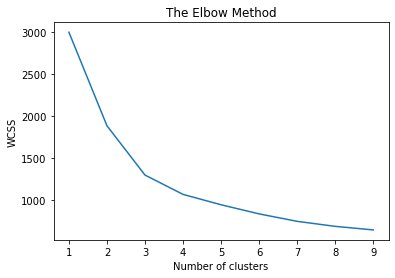

In [86]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10)
    kmeans.fit(num_features_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(num_features_scaled)
np.unique(clusters)
print(clusters)

[0 1 0 1 0 1 0 1 0 1 2 1 2 0 2 2 0 1 1 2 0 0 0 0 2 2 2 0 2 1 2 2 2 0 2 1 1
 2 2 2 2 2 0 1 1 2 2 2 2 2 2 1 2 2 0 2 0 1 2 1 2 0 0 1 2 0 2 2 2 2 1 0 0 1
 2 0 1 0 1 2 0 0 2 0 0 2 2 1 2 2 0 0 2 2 0 1 0 2 2 1 2 2 2 2 2 1 2 2 1 2 2
 2 2 1 2 1 1 2 2 2 2 0 2 0 2 2 2 2 2 2 1 1 2 0 1 2 1 0 2 0 2 1 2 2 2 1 2 0
 1 0 0 2 1 1 1 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 1 1 2 0 2
 2 0 0 2 2 0 1 2 2 1 2 2 2 2 2 0 2 2 2 2 1 0 2 1 0 2 1 0 0 0 2 2 1 2 0 2 2
 2 2 2 2 1 0 2 2 1 0 2 2 0 2 1 0 2 2 2 0 1 2 2 2 0 2 2 2 2 0 2 2 2 1 2 2 2
 0 2 0 2 0 2 2 1 2 1 2 2 2 1 1 1 2 2 0 2 2 2 0 0 0 2 1 1 1 0 0 2 1 1 1 1 1
 2 0 0 2 0 1 2 0 1 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 1 2 0 2 1
 1 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 1 2 2 0 2 2 2 2 2 2 2 1 2
 1 2 2 1 1 1 2 2 1 0 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 0 0 0 0 2 2 1 2 0 2 0
 2 2 2 2 1 0 2 2 1 2 1 2 2 2 2 0 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 0 2 2 2 2 0
 1 0 2 2 0 0 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 0 2 0 0 0 0 2 2 2 1 2 

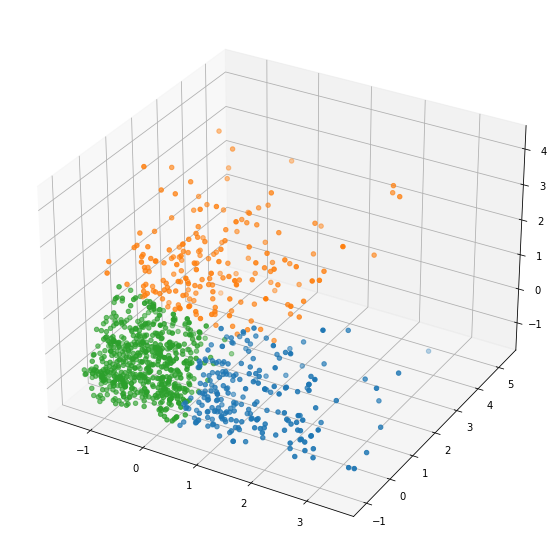

In [88]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_features_scaled[clusters ==i,0], num_features_scaled[clusters ==i,1], num_features_scaled[clusters ==i,2])

In [94]:
df_clustered = num_features[['Age', 'Duration', 'Credit amount']]
df_clustered['Cluster'] = clusters
df_clustered.groupby('Cluster').mean()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [95]:
df_clustered

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()